# NP: Working on summarizing what we have so far

In [422]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.SeqUtils import GC
from Bio import SeqIO
from collections import defaultdict
sys.path.insert(0,'../')
from PhicoreModules import parse_genbank, mean, median, mode, visualise

In [423]:
# Calcualting GC content and coding density of the test datasets
def basic_stats(gbk):
    gc_calc=coding=length=0
    for record in SeqIO.parse(gbk, "genbank"):
        #GC content
        gc_calc=GC(record.seq)
        
        #genome length
        length=len(record.seq)
        
        #coding density
        coding=0
        total_cds_len=0
        for cds in record.features:
            if (cds.type == "CDS"):
                (start, stop, strand) = (cds.location.start.position, cds.location.end.position, cds.strand)
                length_cds=stop-start
                total_cds_len=total_cds_len + length_cds
        coding=(total_cds_len/length)*100

    return (gc_calc, length, coding)

In [436]:
stats=defaultdict()
stats['']=['GC%', 'genome_length', 'Coding']
#all three stop codons, genome stats
for item in (os.listdir('test-data')):
    if (item == "README.md"):
        continue
    elif (item == "Bc01.fasta"):
        fipath="genbank/"+item+"-TAG-TGA-TAA.gbk"
        stats_item=basic_stats(fipath)
        stats[item]=stats_item
    elif (item == "UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta"):
        fipath="genbank/"+item+"-TAG-TGA-TAA.gbk"
        stats_item=basic_stats(fipath)
        stats[item]=stats_item
stats_new=pd.DataFrame.from_dict(stats).transpose()
stats_new.columns = stats_new.iloc[0]
stats_new= stats_new[1:]
stats_new

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


,GC%,genome_length,Coding
Bc01.fasta,35.086212,100102.0,95.43166
UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta,32.951646,101130.0,78.632453


<AxesSubplot:ylabel='Coding'>

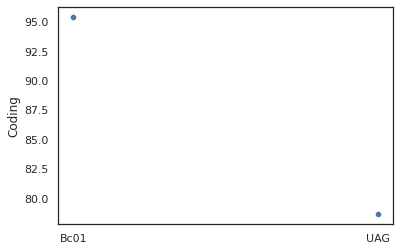

In [438]:
sns.set_theme(font_scale=1)
sns.set_style("white")

#x=['Bc01', 'Bc02', 'Bc11', 'GCA', 'ORFY', 'UAG']
x=['Bc01', 'UAG']
sns.scatterplot(x=x, y="Coding", data=stats_new)

In [439]:
stop_codon=['TAA', 'TGA', 'TAG', 'TAG-TAA', 'TAG-TGA', 'TGA-TAA', 'TAG-TGA-TAA']
stats=defaultdict()
stats['']=['GC%', 'genome_length', 'Coding', 'stop_codon', 'sample']
for item in (os.listdir('test-data')):
    if (item == "README.md"):
        continue
    elif (item == "Bc01.fasta"):
        for stop in stop_codon:
            fipath="genbank/"+item+"-"+stop+".gbk"
            stats_item=list(basic_stats(fipath))
            stats_item.append(stop)
            stats_item.append(item[0:4])
            stats[fipath]=stats_item
    elif (item == "UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta"):
        for stop in stop_codon:
            fipath="genbank/"+item+"-"+stop+".gbk"
            stats_item=list(basic_stats(fipath))
            stats_item.append(stop)
            stats_item.append(item[0:4])
            stats[fipath]=stats_item

stats_new=pd.DataFrame.from_dict(stats).transpose()
stats_new.columns = stats_new.iloc[0]
stats_new= stats_new[1:]
stats_new

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


,GC%,genome_length,Coding,stop_codon,sample
genbank/Bc01.fasta-TAA.gbk,35.086212,100102,96.252822,TAA,Bc01
genbank/Bc01.fasta-TGA.gbk,35.086212,100102,99.867136,TGA,Bc01
genbank/Bc01.fasta-TAG.gbk,35.086212,100102,99.153863,TAG,Bc01
genbank/Bc01.fasta-TAG-TAA.gbk,35.086212,100102,96.222853,TAG-TAA,Bc01
genbank/Bc01.fasta-TAG-TGA.gbk,35.086212,100102,97.889153,TAG-TGA,Bc01
genbank/Bc01.fasta-TGA-TAA.gbk,35.086212,100102,95.839244,TGA-TAA,Bc01
genbank/Bc01.fasta-TAG-TGA-TAA.gbk,35.086212,100102,95.43166,TAG-TGA-TAA,Bc01
genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAA.gbk,32.951646,101130,95.238802,TAA,UAG-
genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TGA.gbk,32.951646,101130,99.887274,TGA,UAG-
genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG.gbk,32.951646,101130,95.962622,TAG,UAG-


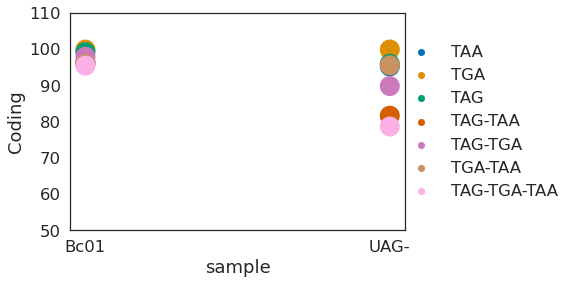

In [440]:
sns.set_theme(font_scale=1.5)
sns.set_style("white")

ax=sns.scatterplot(x="sample", y="Coding", hue="stop_codon", data=stats_new, 
                palette="colorblind",linewidth=0, alpha=1, s=400)
sns.move_legend(
    ax, "right",
    bbox_to_anchor=(1.5, 0.5), title=None, frameon=False,
)
ax.set_ylim(50,110)
plt.savefig('images/overview.png')

### Code from coding_density/CDdistributions.ipynb

In [441]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import sys
import gzip
from Bio import SeqIO
import binascii

from PhicoreModules import parse_genbank, median, mean, stdev, mode

In [442]:
def coding_regions(entry: Bio.SeqRecord.SeqRecord, verbose: bool = False) -> list[int]:
    """
    calculate a list of ints of the regions that are coding for the record
    
    :param record: The genbank record entry (ie. one sequence record)
    :param verbose: more output
    :return : a list of 1's and 0's. 1: the base is encoding. 0: the base is not
    """
    
    seqlen = len(entry.seq)
    coding = [0 for i in range(seqlen)]
    fn = {'CDS': 0, 'tRNA': 0}
    for feat in entry.features:
        if feat.type != 'CDS' and feat.type != 'tRNA':
            print(f"Skipped feature of type: {feat.type}", file=sys.stderr)
            continue
        fn[feat.type] = fn.get(feat.type, 0) + 1
        (start, stop, strand) = (feat.location.start.position, feat.location.end.position, feat.strand)
        for i in range(start, stop):
            coding[i] = 1
    if verbose:
        print(f"Found {fn['CDS']} CDS and {fn['tRNA']} tRNA", file=sys.stderr)
    return coding

In [443]:
def coding_stats(coding: list[int], window: int, step: int, verbose: bool = False) -> dict[str, int]:
    """
    Calculate the statistics for this coding window
    :param coding: the list of coding/not coding regions(a list of 1's and 0's)
    :param window: the window to calculate the average across
    :param step: the step size between windows
    :param verbose: more output
    :return : a dictionary summaring the statistics
    """
    
    winbeg = 0
    allcd = {}

    while winbeg + step + window < len(coding):
        winend = winbeg + window
        cd = sum(coding[winbeg:winend])/window
        allcd[winbeg] = cd
        winbeg += step
    
    return {
        'mean': sum(allcd.values())/len(allcd.values()),
        'median' : median(list(allcd.values())),
        'mode': mode(allcd.values()),
        'minimum': min(allcd.values()),
        'maximum': max(allcd.values()),
        'all': allcd
    }

In [444]:
def calc_coding_density(filestub, gbkdir = 'genbank/'):
    codden = pd.DataFrame()
    data = {}
    coding = []
    for file in os.listdir(gbkdir):
        if not filestub in file:
            continue
        seq = parse_genbank(os.path.join(gbkdir, file))

        for entry in seq.records:
            coding = coding_regions(entry, verbose=True)
            stats = coding_stats(coding, 5000, 2500)
            data[file] = [stats['mean'], stats['median'], stats['mode'], stats['minimum'], stats['maximum']]
            if codden.empty:
                codden = pd.DataFrame.from_dict(stats['all'], orient='index',columns=[file]).reset_index()
                codden = codden.rename(columns={'index': 'x'})
            else:
                codden[file] = codden['x'].map(stats['all'])

    return pd.DataFrame.from_dict(data, orient='index', columns=['mean', 'median', 'mode', 'minimum', 'maximum']), codden

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 123 CDS and 19 tRNA
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 123 CDS and 20 tRNA
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 119 CDS and 22 tRNA
/home/nala0006/miniconda3/envs/not

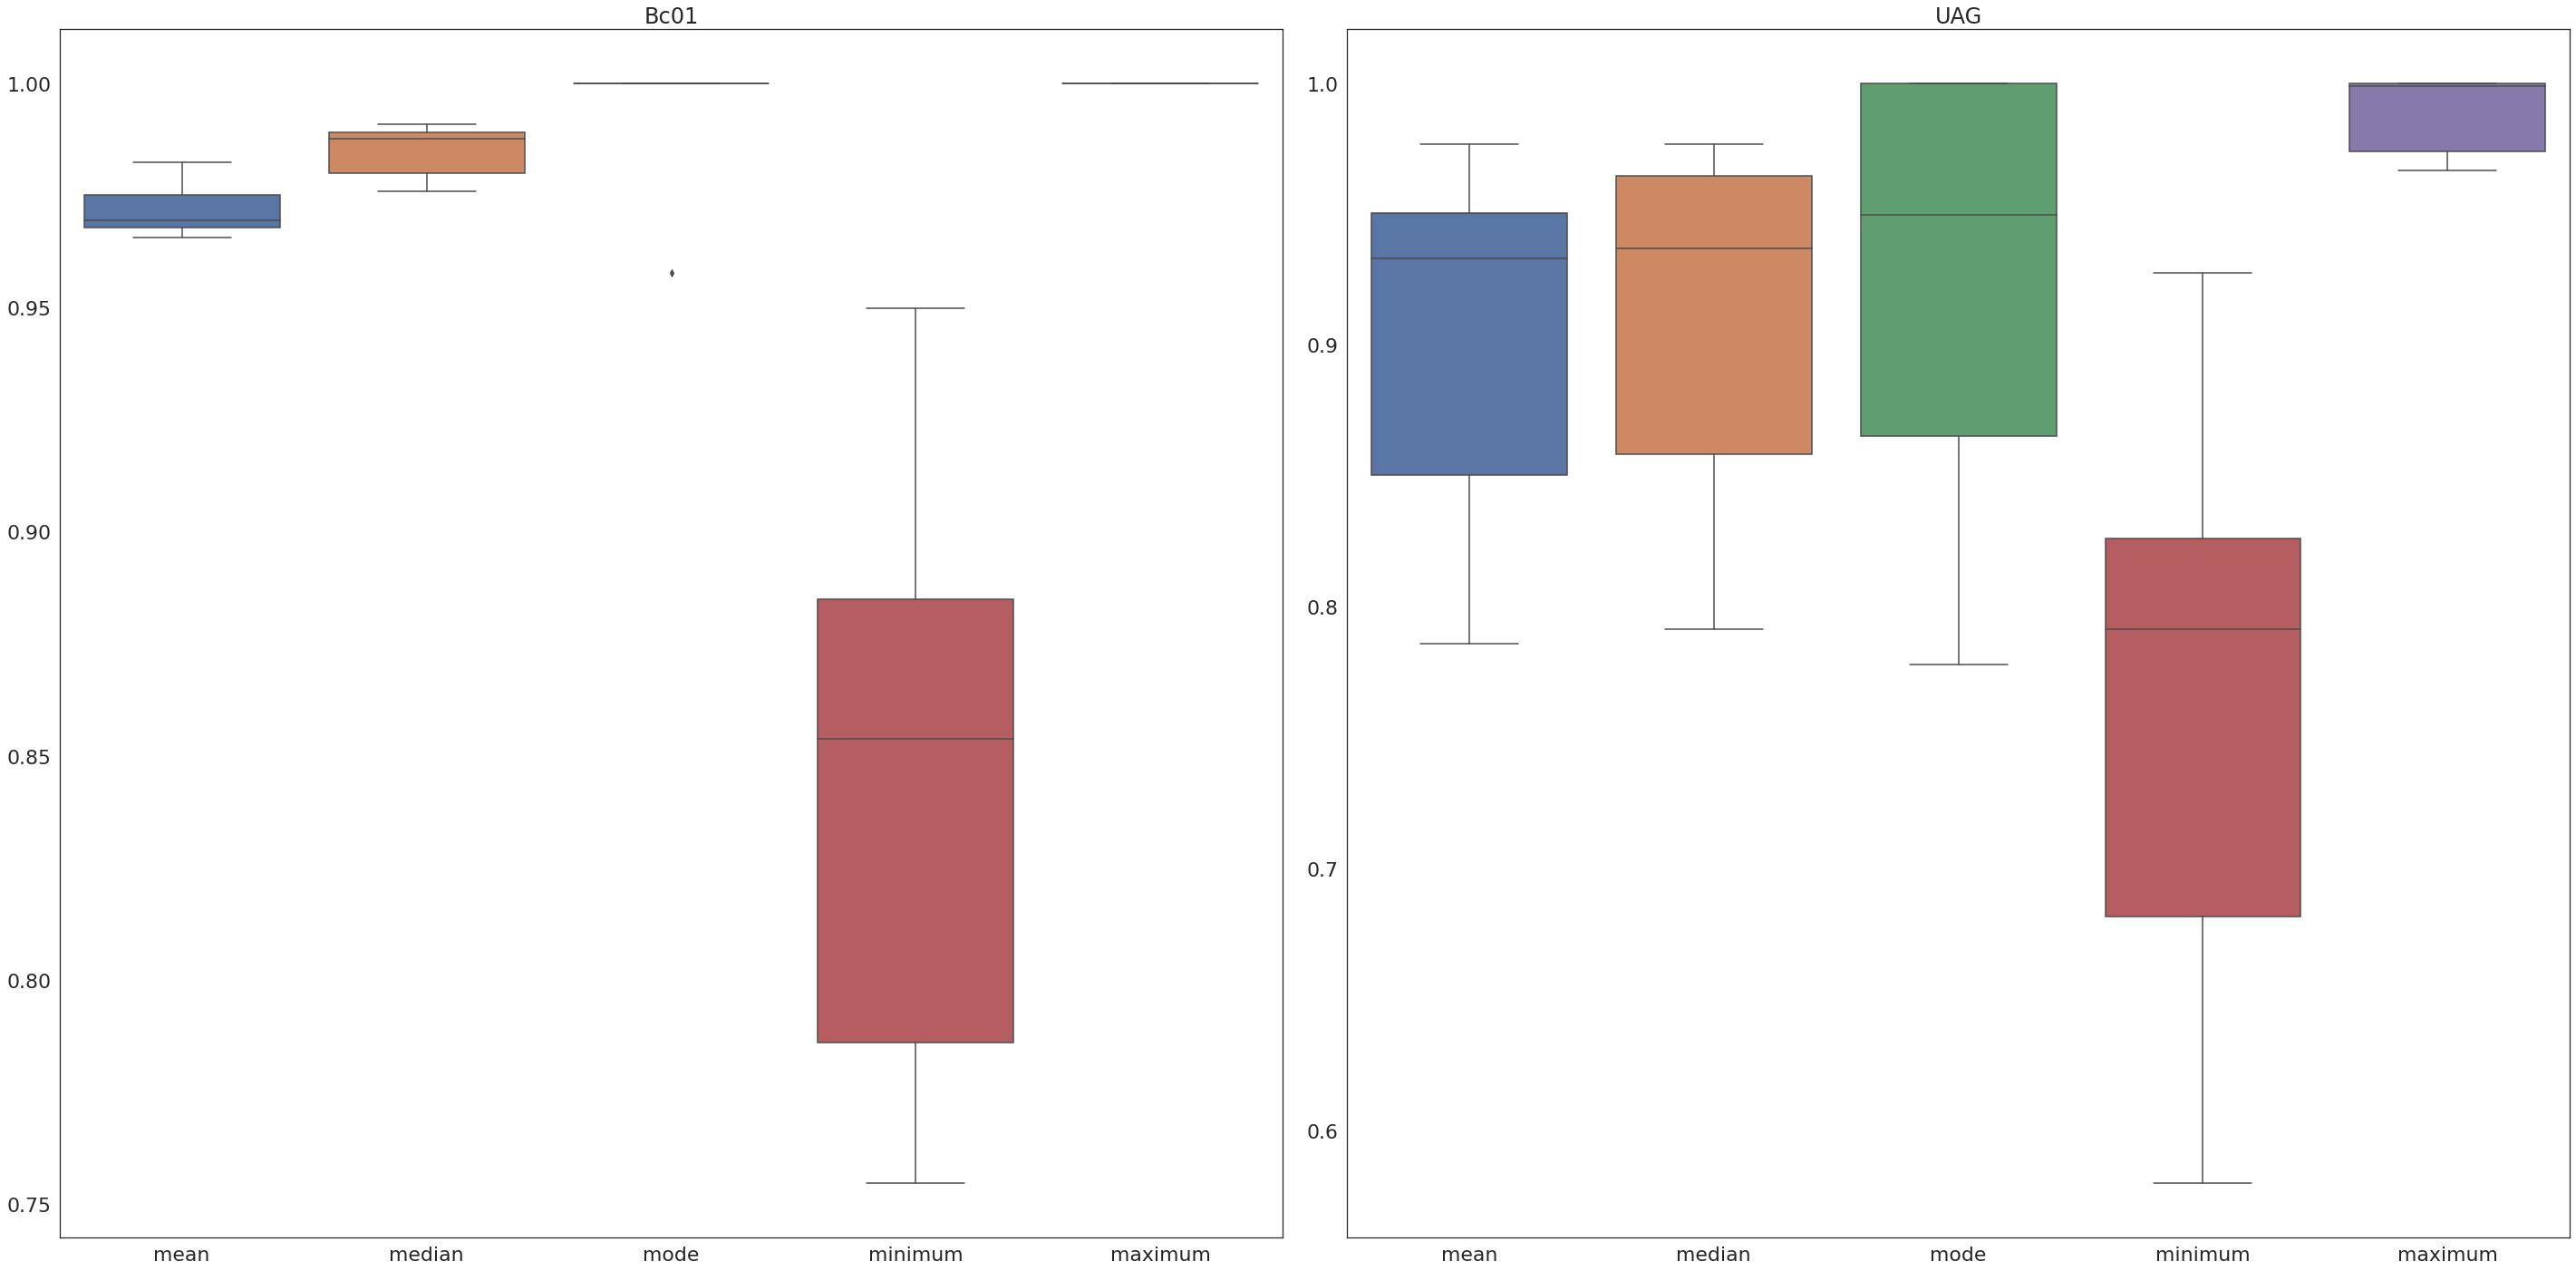

In [448]:
sns.set_theme(font_scale=2)
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(40,20), constrained_layout=True, tight_layout=True)
summary, cod = calc_coding_density(filestub='Bc01.fasta')
sns.boxplot(ax=axes[0], data=summary).set(title='Bc01')
#summary, cod = calc_coding_density(filestub='Bc02.fasta')
#sns.boxplot(ax=axes[0,1],data=summary).set(title='Bc02')
#summary, cod = calc_coding_density(filestub='Bc11.fasta')
#sns.boxplot(ax=axes[1,0],data=summary).set(title='Bc11')
#summary, cod = calc_coding_density(filestub='GCA_002135175.2-subset.fasta')
#sns.boxplot(ax=axes[1,1],data=summary).set(title='GCA')
#summary, cod = calc_coding_density(filestub='OFRY01000050.fasta')
#sns.boxplot(ax=axes[2,0],data=summary).set(title='OFRY')
summary, cod = calc_coding_density(filestub='UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta')
sns.boxplot(ax=axes[1],data=summary).set(title='UAG')
plt.savefig('images/coding_density.png')

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 123 CDS and 19 tRNA
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 123 CDS and 20 tRNA
/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source
Found 119 CDS and 22 tRNA
/home/nala0006/miniconda3/envs/not

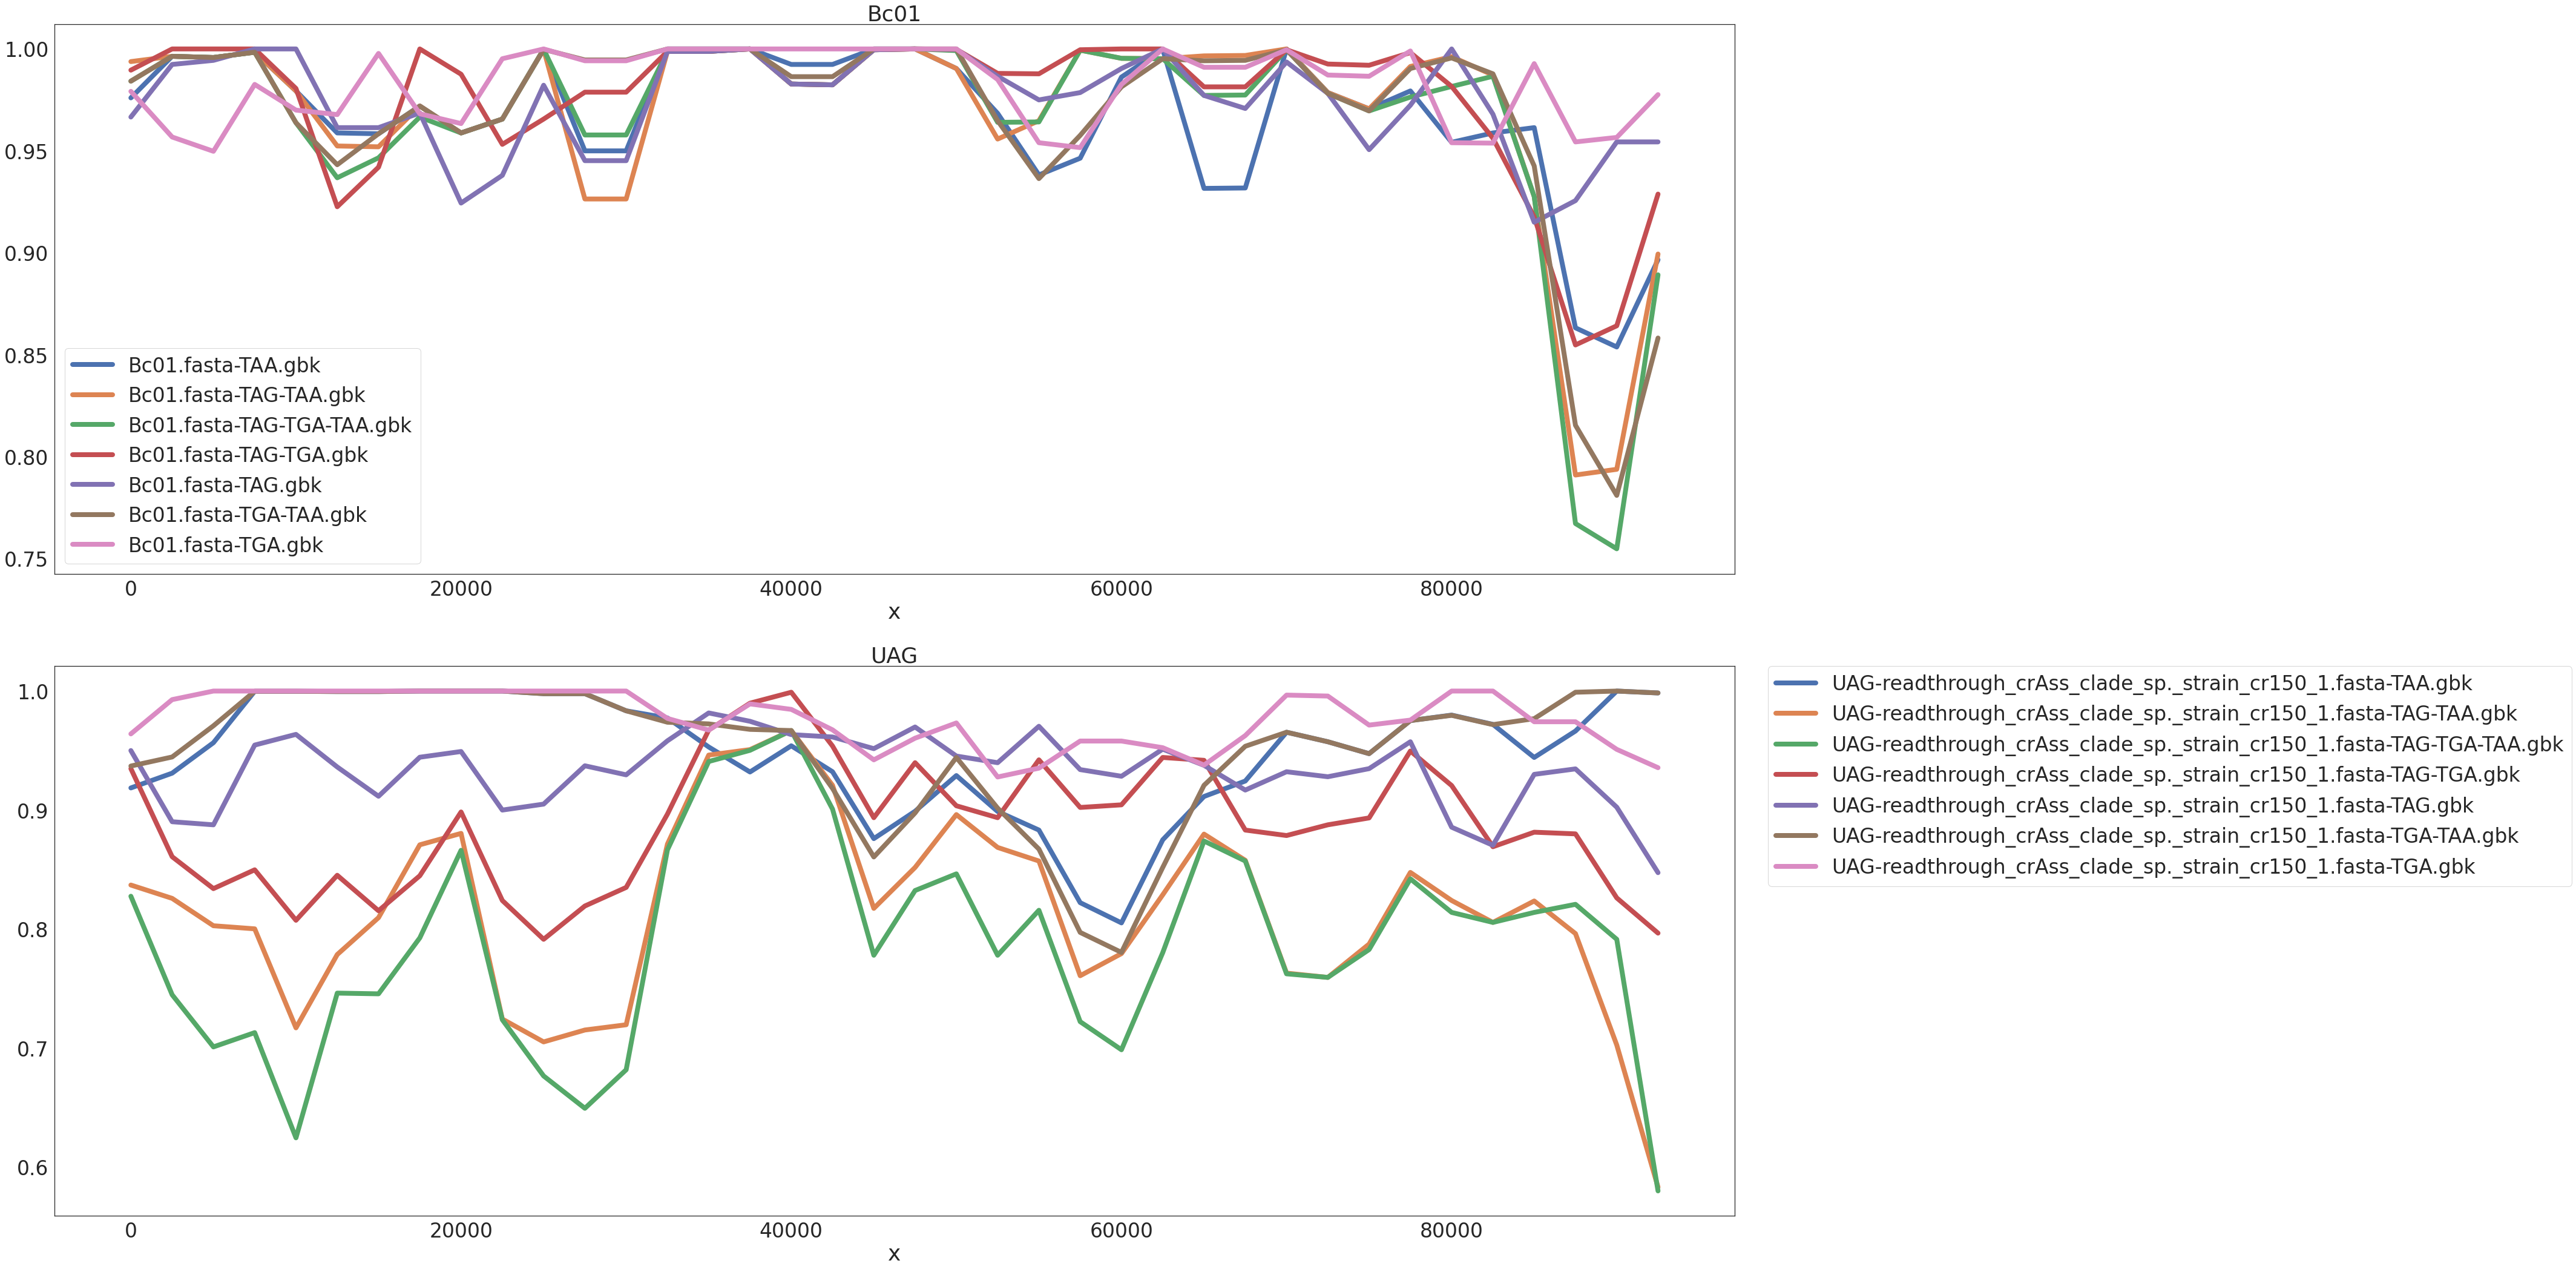

In [450]:
sns.set_theme(font_scale=3)
sns.set_style("white")

fig, axes = plt.subplots(2, 1, figsize=(60, 30), constrained_layout=True, tight_layout=True)

summary, cd = calc_coding_density(filestub='Bc01.fasta')
g = cd.plot(ax=axes[0], x='x', linewidth=8).set(title='Bc01')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#summary, cd = calc_coding_density(filestub='Bc11.fasta')
#g = cd.plot(ax=axes[1], x='x', linewidth=8).set(title='Bc11')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#summary, cd = calc_coding_density(filestub='OFRY01000050.fasta')
#g = cd.plot(ax=axes[2], x='x', linewidth=8).set(title='OFRY')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

summary, cd = calc_coding_density(filestub='UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta')
g = cd.plot(ax=axes[1], x='x', linewidth=8).set(title='UAG')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('images/coding_density_across_genome.png')

### Distribution of stop codons, code from getting_started_gb.ipynb

In [451]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import sys
import gzip
from Bio import SeqIO
import binascii

from PhicoreModules import parse_genbank, median, mean, stdev, mode
from PhicoreModules import get_features_of_type, get_features_lengths, get_gc_content, get_coding_density, get_distribution_of_stops # Przemek's functions
from PhicoreModules import get_mean_cds_length_rec_window, get_rolling_gc, get_rolling_mean_cds, get_rolling_deltas,get_rolling_count_cds, get_cds_count_length_rec_window # George's functions
from PhicoreModules import write_df_to_artemis

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(


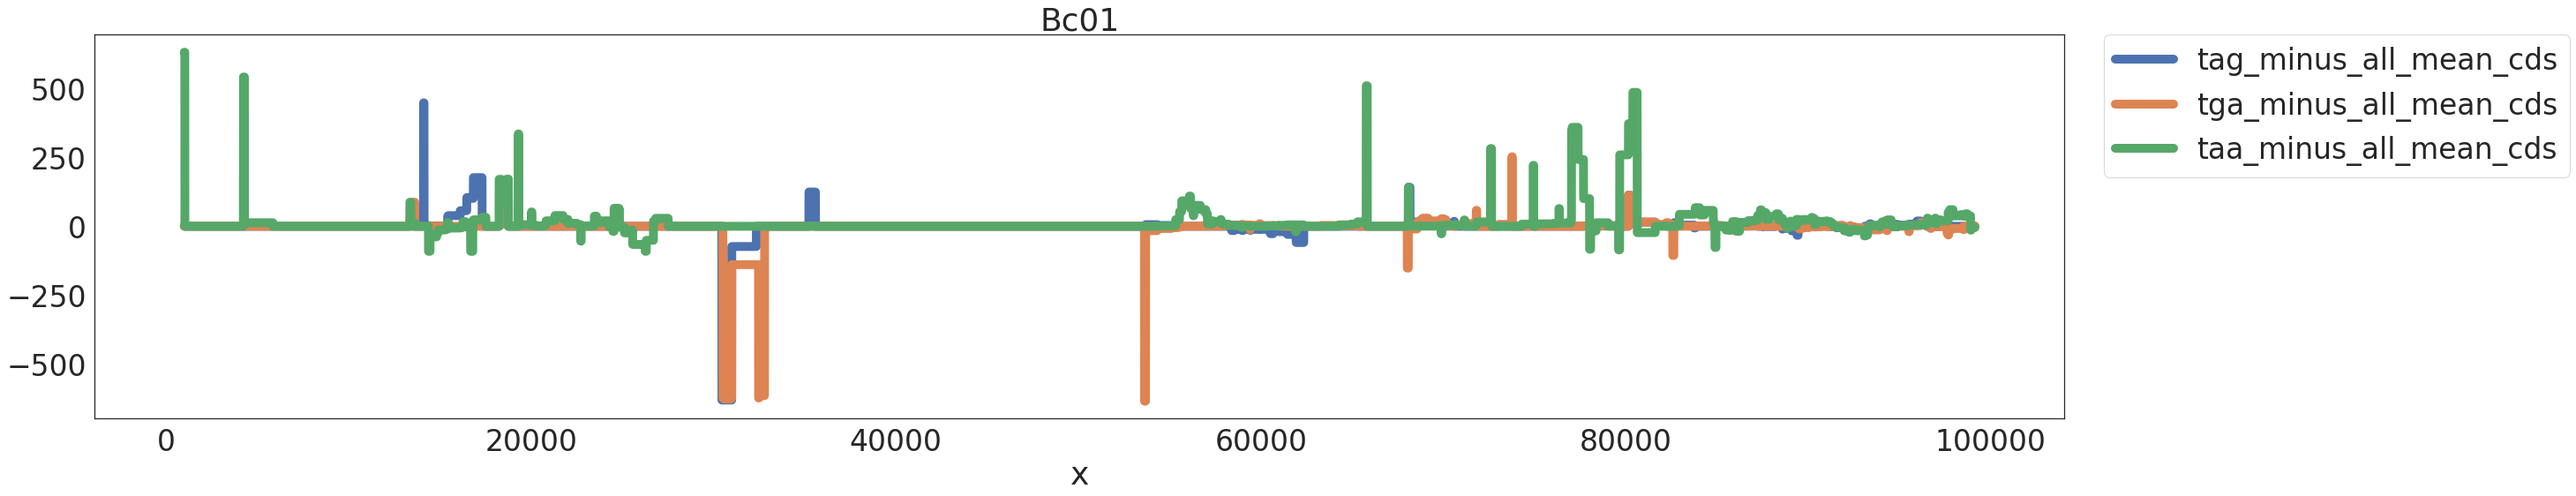

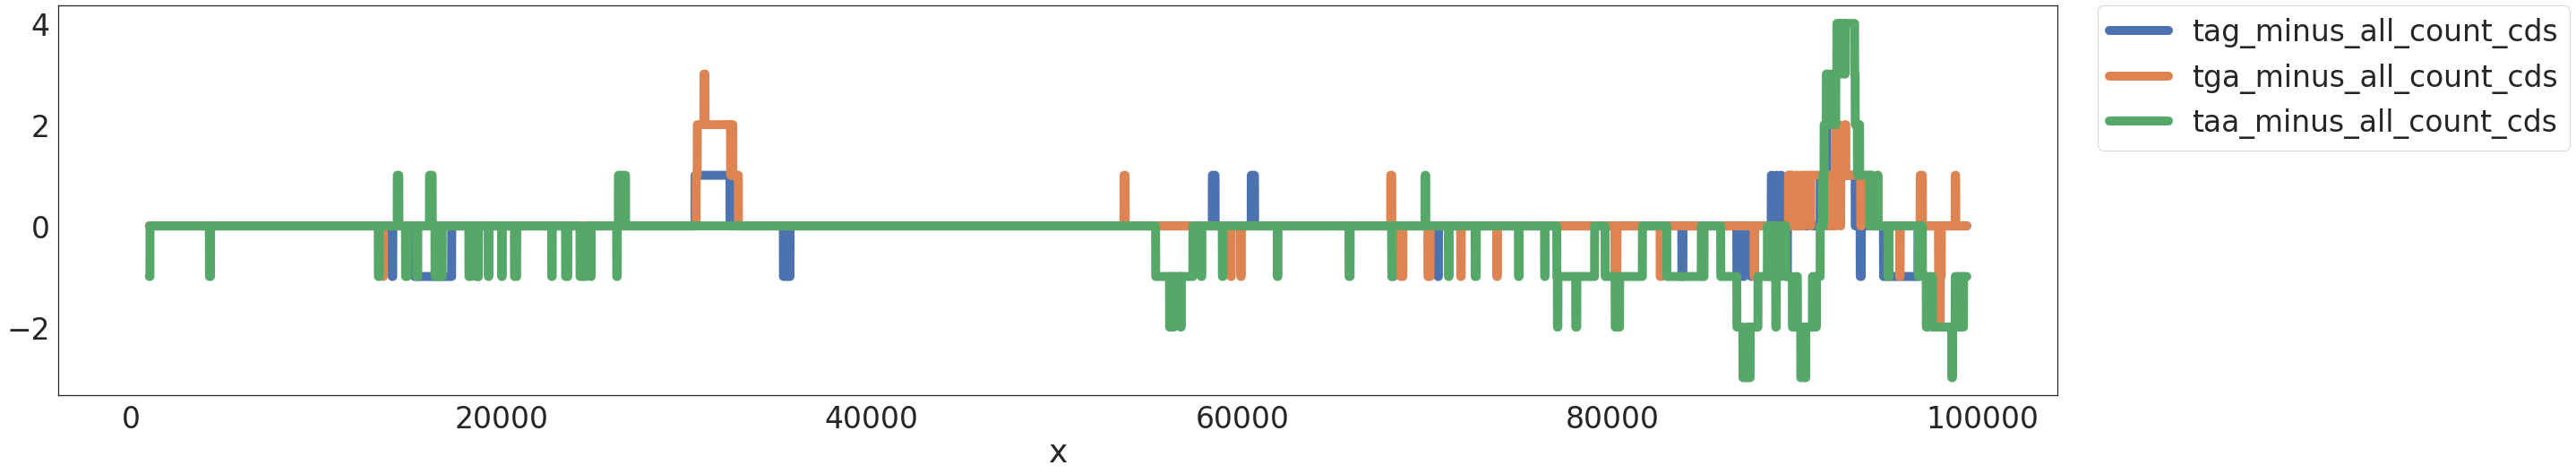

In [453]:
df_all_bc01 = get_rolling_deltas(genbank_path_all = './genbank/Bc01.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/Bc01.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/Bc01.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/Bc01.fasta-TAG-TGA.gbk', window = 5000, step= 100)

df_all_bc01.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8), linewidth=10).set(title='Bc01')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

df_all_bc01.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8), linewidth=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


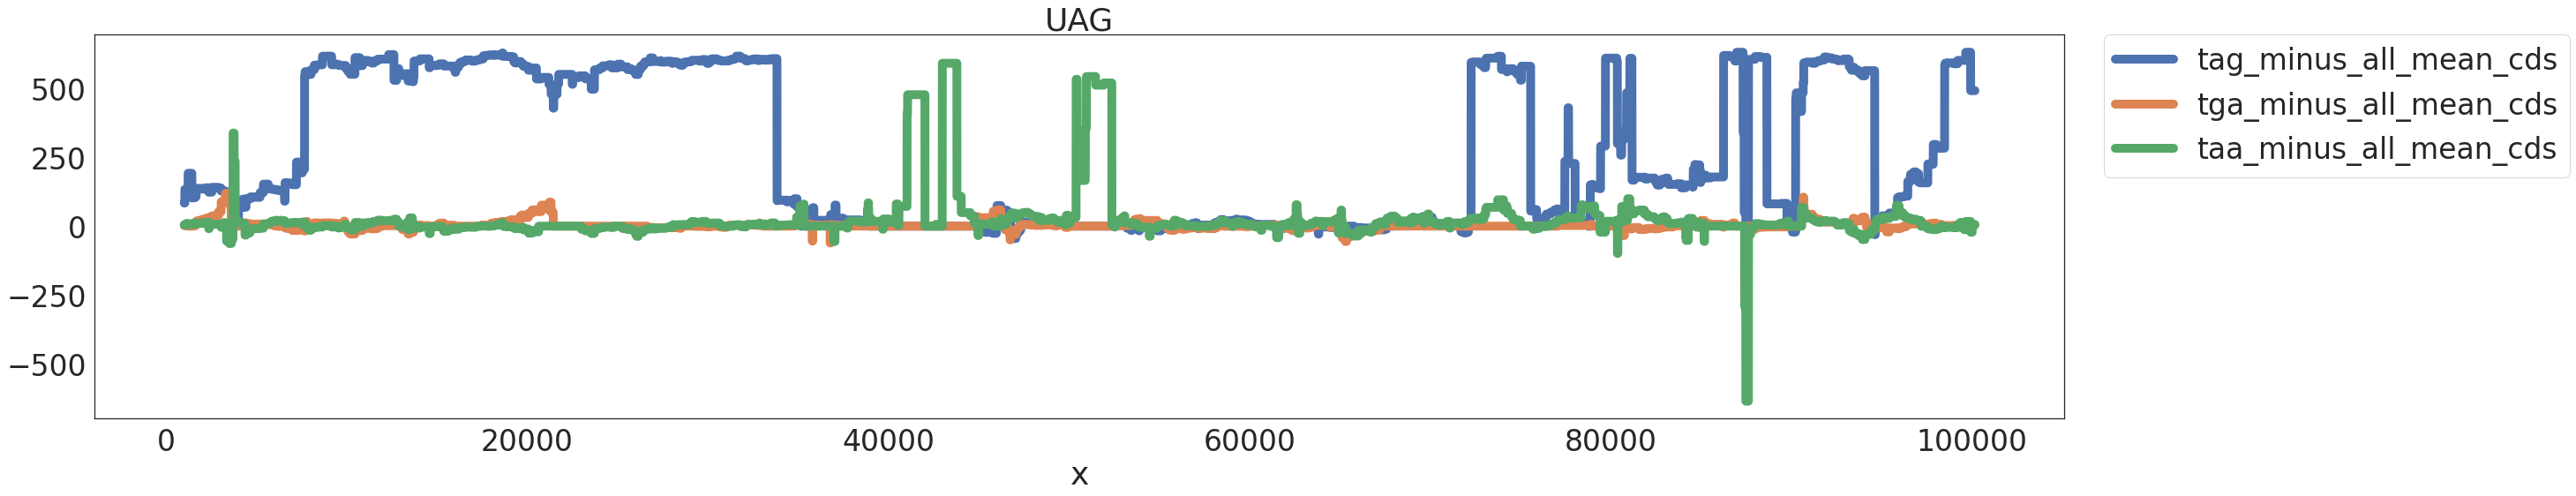

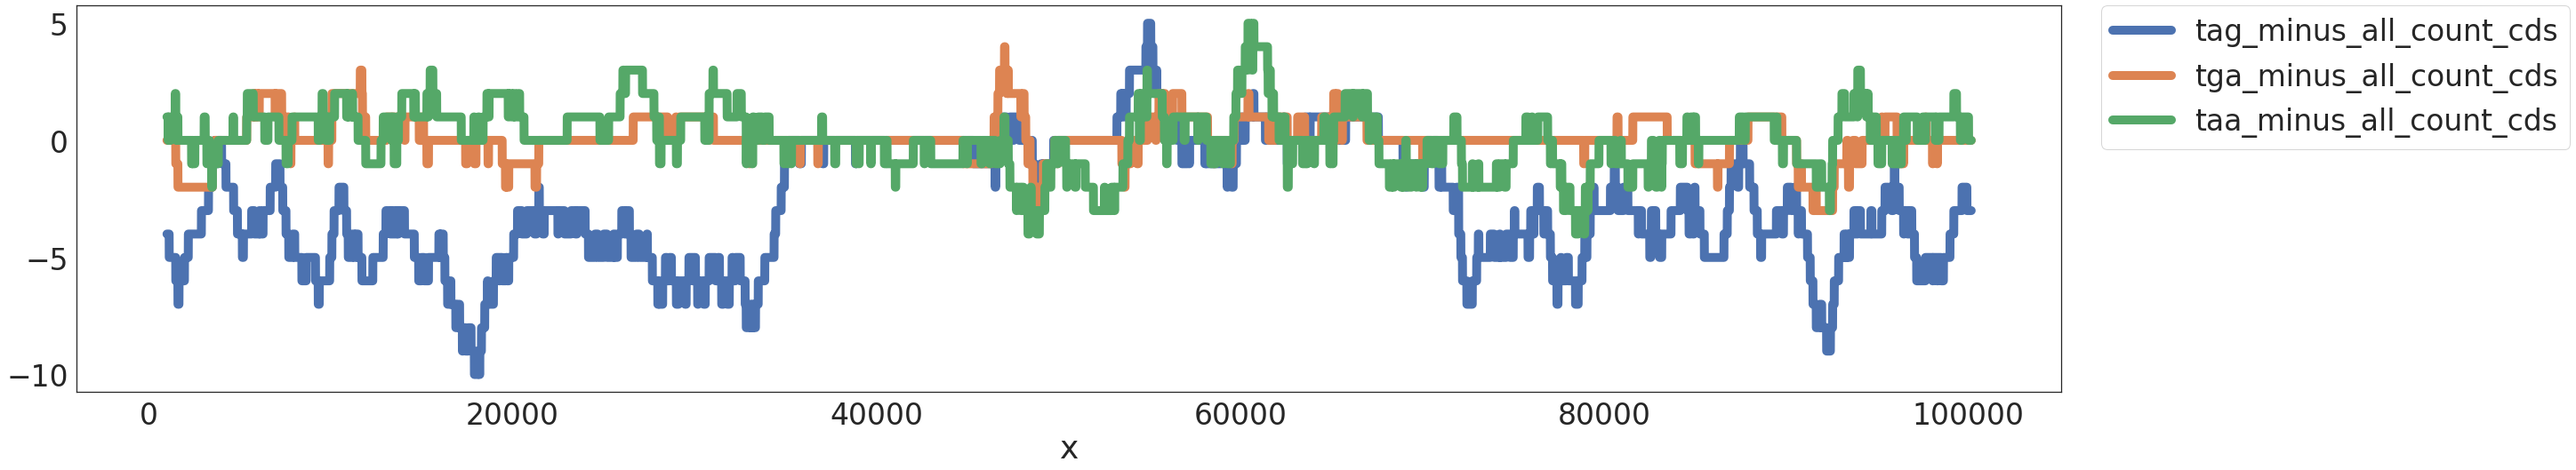

In [454]:

df_all_uag = get_rolling_deltas(genbank_path_all = 'genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TGA-TAA.gbk',
genbank_path_tag = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TGA-TAA.gbk',
genbank_path_tga = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TAA.gbk',
genbank_path_taa = './genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1.fasta-TAG-TGA.gbk', window =5000, step=100)

df_all_uag.plot(x="x", y=["tag_minus_all_mean_cds", "tga_minus_all_mean_cds", 'taa_minus_all_mean_cds'], figsize=(40, 8), linewidth=10).set(title='UAG')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

df_all_uag.plot(x="x", y=["tag_minus_all_count_cds", "tga_minus_all_count_cds", 'taa_minus_all_count_cds'], figsize=(40, 8), linewidth=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


### Number of genes